
PassengerId - A unique Id for each passenger. 

Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling 
with and pp is their number within the group. 


People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.


CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.


Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.


Destination - The planet the passenger will be debarking to.


Age - The age of the passenger.


VIP - Whether the passenger has paid for special VIP service during the voyage.


RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.


Name - The first and last names of the passenger.


Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.





---



---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)

In [ ]:
df1=pd.read_csv('/content/test titanic.csv')
df2=pd.read_csv('/content/train titanic.csv')
frames=[df1,df2]
df = pd.concat(frames)
df


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [ ]:
#deal with missing values
df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
knniputer = KNNImputer()


In [ ]:
imputer= SimpleImputer(strategy='most_frequent',verbose=1)
df['Cabin']=imputer.fit_transform(df[['Cabin']])

In [ ]:

imputer= SimpleImputer(strategy='most_frequent',verbose=1)
df['VIP']=imputer.fit_transform(df[['VIP']])

In [ ]:

imputer= SimpleImputer(strategy='most_frequent',verbose=1)
df['Destination']=imputer.fit_transform(df[['Destination']])

In [ ]:
imputer= SimpleImputer(strategy='most_frequent',verbose=1)
df['HomePlanet']=imputer.fit_transform(df[['HomePlanet']])

In [ ]:

imputer= SimpleImputer(strategy='mean',verbose=1)
df['Age']=imputer.fit_transform(df[['Age']])

In [ ]:

imputer= SimpleImputer(strategy='mean',verbose=1)
df['RoomService']=imputer.fit_transform(df[['RoomService']])

In [ ]:

imputer= SimpleImputer(strategy='mean',verbose=1)
df['FoodCourt']=imputer.fit_transform(df[['FoodCourt']])

In [ ]:

imputer= SimpleImputer(strategy='mean',verbose=1)
df['ShoppingMall']=imputer.fit_transform(df[['ShoppingMall']])

In [ ]:

imputer= SimpleImputer(strategy='mean',verbose=1)
df['Spa']=imputer.fit_transform(df[['Spa']])

In [ ]:

imputer= SimpleImputer(strategy='mean',verbose=1)
df['VRDeck']=imputer.fit_transform(df[['VRDeck']])

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
!pip install datasist

In [ ]:
import datasist as ds


In [ ]:
ds.structdata.describe(df)

First five data points


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True




Random five data points


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3180,3428_02,Europa,False,C/113/P,TRAPPIST-1e,27.0,False,0.0,18481.0,0.0,2.000000,3875.0,Terope Cumpting,True
7075,7529_01,Earth,True,G/1221/S,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.000000,0.0,Harrie Combson,True
1183,1255_01,Mars,True,F/242/S,TRAPPIST-1e,52.0,False,0.0,0.0,0.0,308.476904,0.0,Shres Potte,True
627,0655_01,Mars,False,E/39/P,TRAPPIST-1e,37.0,False,237.0,2.0,708.0,0.000000,0.0,Phios Cure,True
2896,3131_01,Earth,True,G/492/S,55 Cancri e,48.0,False,0.0,0.0,0.0,0.000000,0.0,Salley Mckinn,True




Last five data points


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True




Shape of  data set: (8286, 14)


Size of  data set: 116004


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64




Numerical Features in Data set
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


Categorical Features in Data set


['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Transported']



Statistical Description of Columns


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000
mean,28.858327,224.102561,457.251544,172.714649,312.164676,302.176169
std,14.303043,656.765919,1600.500029,550.442152,1136.431549,1106.518704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,80.000000,120.750000,45.000000,91.000000,72.000000
max,79.000000,14327.000000,29813.000000,12253.000000,22408.000000,20336.000000




Description of Categorical Features


,count,unique,top,freq
PassengerId,8286,8286,0001_01,1
HomePlanet,8286,3,Earth,4580
CryoSleep,8286,2,False,5311
Cabin,8286,6321,G/160/P,190
Destination,8286,3,TRAPPIST-1e,5812
VIP,8286,2,False,8093
Name,8286,8266,Glenna Valezaley,2
Transported,8286,2,True,4175




Unique class Count of Categorical features


,Feature,Unique Count
0,PassengerId,8286
1,HomePlanet,3
2,CryoSleep,2
3,Cabin,6321
4,Destination,3
5,VIP,2
6,Name,8266
7,Transported,2




Missing Values in Data


,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,HomePlanet,0,0.0
2,CryoSleep,0,0.0
3,Cabin,0,0.0
4,Destination,0,0.0
5,Age,0,0.0
6,VIP,0,0.0
7,RoomService,0,0.0
8,FoodCourt,0,0.0
9,ShoppingMall,0,0.0


In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
df.drop(columns=["PassengerId"], 
       axis=1, inplace=True)


In [ ]:
df.shape

(8286, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8286 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8286 non-null   object 
 1   CryoSleep     8286 non-null   object 
 2   Cabin         8286 non-null   object 
 3   Destination   8286 non-null   object 
 4   Age           8286 non-null   float64
 5   VIP           8286 non-null   object 
 6   RoomService   8286 non-null   float64
 7   FoodCourt     8286 non-null   float64
 8   ShoppingMall  8286 non-null   float64
 9   Spa           8286 non-null   float64
 10  VRDeck        8286 non-null   float64
 11  Name          8286 non-null   object 
 12  Transported   8286 non-null   object 
dtypes: float64(6), object(7)
memory usage: 906.3+ KB


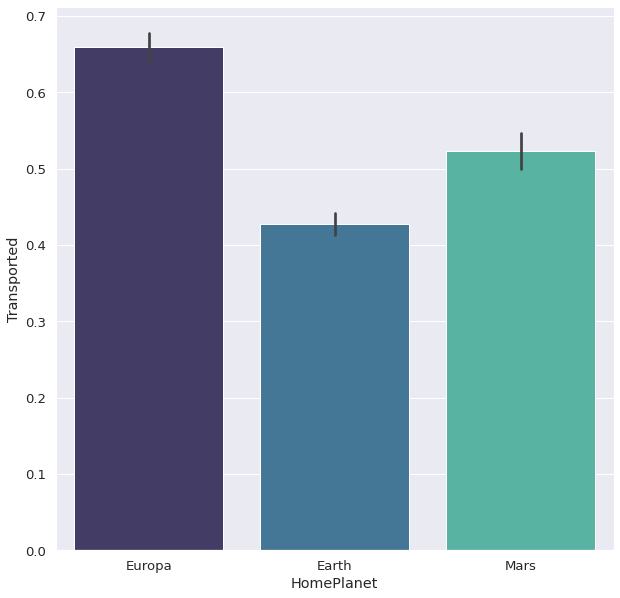

In [ ]:
sns.barplot(y='Transported',x='HomePlanet',data=df,palette='mako')

In [ ]:
px.histogram(data_frame=df, x="HomePlanet", color="Transported")

In [ ]:
px.histogram(data_frame=df, x="Age", color="Transported")

In [ ]:

num = df.select_dtypes("number").columns
num

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [ ]:
px.scatter_3d(data_frame=df, x="RoomService", y="ShoppingMall", z="Spa", color="Transported")

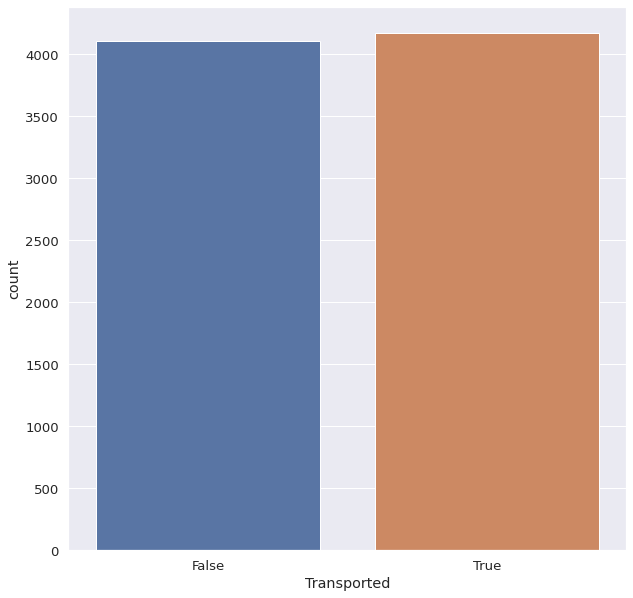

In [ ]:
sns.countplot(df['Transported'])

In [ ]:
df['Transported'].value_counts()

True     4175
False    4111
Name: Transported, dtype: int64

In [ ]:
cats = df.select_dtypes("object").columns
cats

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name',
       'Transported'],
      dtype='object')

In [ ]:
col=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 
       'Transported']

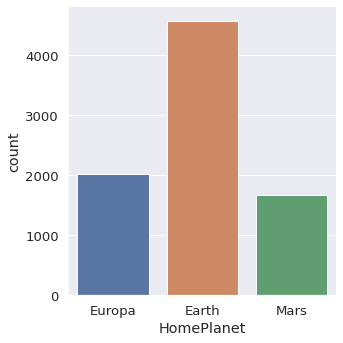

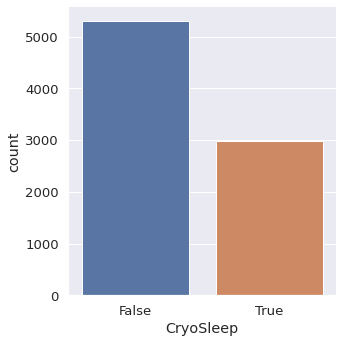

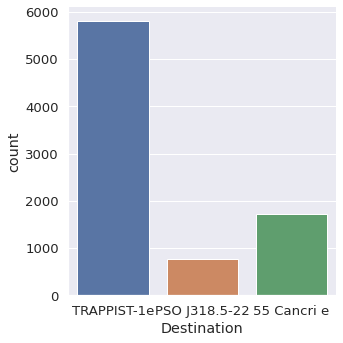

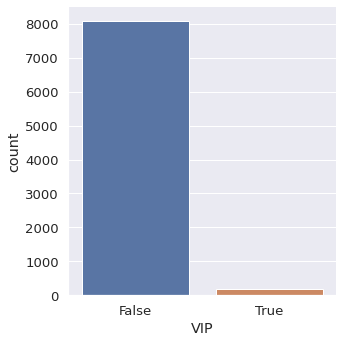

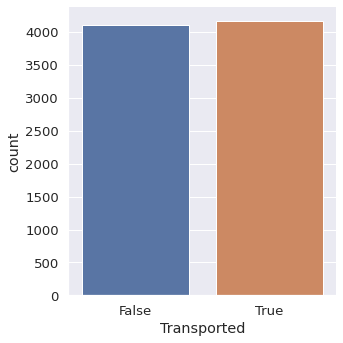

In [ ]:

for i in col:
  sns.catplot(data=df,x=i,kind='count')

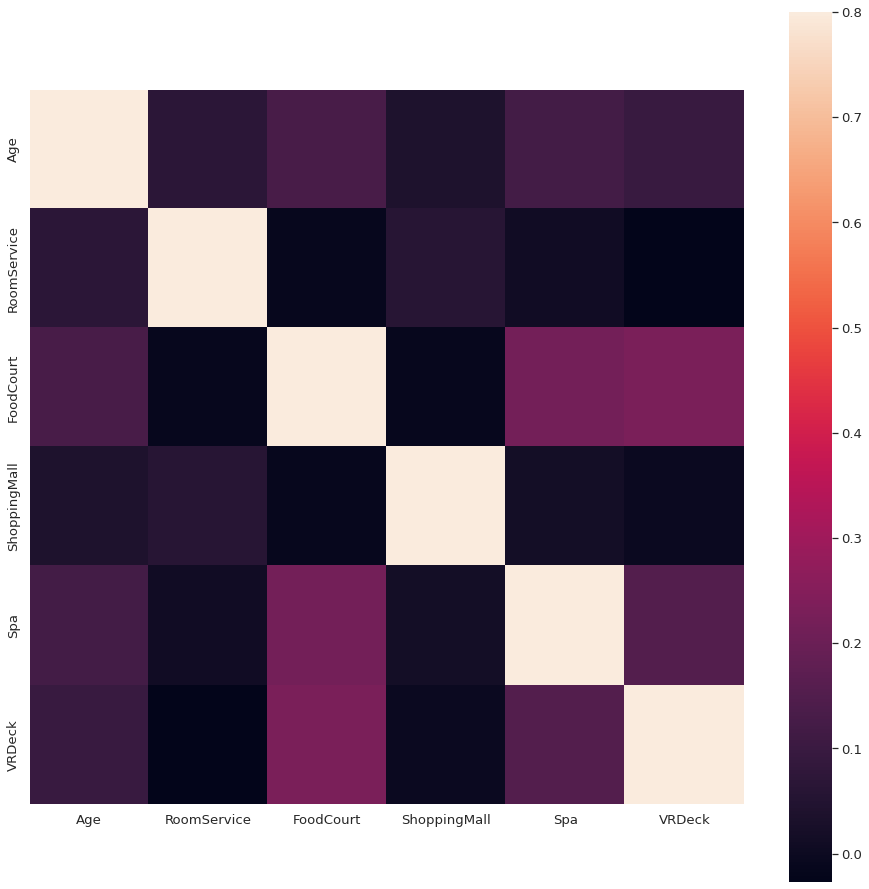

In [ ]:
#correlations
plt.subplots(figsize=(16, 16))


sns.heatmap(df.corr(), vmax=.8, square=True);

In [ ]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.069953,0.130426,0.039104,0.121742,0.099129
RoomService,0.069953,1.000000,-0.013691,0.059808,0.008767,-0.026792
FoodCourt,0.130426,-0.013691,1.000000,-0.013836,0.217550,0.231144
ShoppingMall,0.039104,0.059808,-0.013836,1.000000,0.016920,-0.004169
Spa,0.121742,0.008767,0.217550,0.016920,1.000000,0.153378
VRDeck,0.099129,-0.026792,0.231144,-0.004169,0.153378,1.000000


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(8286, 13)

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()

for item in cats:
    le.fit(df[item])
    df[item] = le.transform(df[item])


for cat in cats:
    print(f"The current column is : {cat}\n")
    print(df[cat].value_counts())
    print("-" *100 +"\n\n")

The current column is : HomePlanet

0    4580
1    2028
2    1678
Name: HomePlanet, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : CryoSleep

0    5311
1    2975
Name: CryoSleep, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : Cabin

5110    190
5934      8
1120      7
4910      7
748       7
       ... 
3897      1
3896      1
5657      1
3894      1
4209      1
Name: Cabin, Length: 6321, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : Destination

2    5812
0    1714
1     760
Name: Destination, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : VIP

0    8093
1     193
Name: VIP, dtype: int64
-------------------------------

In [ ]:
df.describe()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000
mean,0.649771,0.359039,3087.476949,1.494569,28.858327,0.023292,224.102561,457.251544,172.714649,312.164676,302.176169,4130.220854,0.503862
std,0.795403,0.479748,1904.085449,0.814715,14.303043,0.150839,656.765919,1600.500029,550.442152,1136.431549,1106.518704,2386.321063,0.500015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1303.250000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2064.250000,0.000000
50%,0.000000,0.000000,3103.500000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4128.500000,1.000000
75%,1.000000,1.000000,4838.000000,2.000000,37.000000,0.000000,80.000000,120.750000,45.000000,91.000000,72.000000,6196.750000,1.000000
max,2.000000,1.000000,6320.000000,2.000000,79.000000,1.000000,14327.000000,29813.000000,12253.000000,22408.000000,20336.000000,8265.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x=df.drop('Transported',axis=1)
y=df['Transported']

In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, confusion_matrix

In [ ]:
models = {
    'LR': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RF': RandomForestClassifier(),
    'XGB': XGBClassifier()
}

In [ ]:
for name, model in models.items():
    print(f'Model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Confusion Matrix\n{confusion_matrix(y_test, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'Precession: {precision_score(y_test, y_pred)}')
    print(f'F1: {f1_score(y_test, y_pred)}')
    print(f'FBeta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*80)

Model: LR
Confusion Matrix
[[558 269]
 [106 725]]
Accuracy: 0.7738238841978287
Recall: 0.8724428399518652
Precession: 0.7293762575452716
F1: 0.7945205479452054
FBeta: 0.7541085916371958
--------------------------------------------------------------------------------
Model: KNN
Confusion Matrix
[[572 255]
 [154 677]]
Accuracy: 0.7533172496984318
Recall: 0.8146811070998796
Precession: 0.7263948497854077
F1: 0.7680090754395916
FBeta: 0.7424873875849967
--------------------------------------------------------------------------------
Model: DT
Confusion Matrix
[[583 244]
 [217 614]]
Accuracy: 0.7219541616405307
Recall: 0.7388688327316486
Precession: 0.7156177156177156
F1: 0.7270574304322084
FBeta: 0.720150129017124
--------------------------------------------------------------------------------
Model: SVM
Confusion Matrix
[[524 303]
 [ 78 753]]
Accuracy: 0.770205066344994
Recall: 0.9061371841155235
Precession: 0.7130681818181818
F1: 0.7980922098569158
FBeta: 0.744807121661721
--------------

In [ ]:
#tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
model = LogisticRegression()
params = [
    {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1, 10, 100, 1000]}
]

In [ ]:
model = KNeighborsClassifier()
params = [
    {'n_neighbors': range(5, 30, 2)}
]

In [ ]:
model = DecisionTreeClassifier()
params = [
    {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20)}
]

In [ ]:
model = SVC()
params = [
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': range(2, 20)},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']}
]

In [ ]:
model = RandomForestClassifier()
params = [
    {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20), 'n_estimators': range(100, 501, 50)}
]

In [ ]:
model = XGBClassifier()
params = [
    {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20), 'n_estimators': range(100, 501, 50)}
]

In [ ]:
# gs = GridSearchCV(estimator=model, param_grid=params, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
gs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
gs.fit(x, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': range(1, 20),
                                         'n_estimators': range(100, 501, 50)}],
                   scoring='accuracy', verbose=1)

In [ ]:
gs.best_score_     

0.7873628374795313

In [ ]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 250}

In [ ]:
model = gs.best_estimator_
model

XGBClassifier(criterion='gini', max_depth=2, n_estimators=250)